In [2]:
import numpy as np
import pandas as pd

df2=pd.read_csv('soyang3.csv',index_col=0, header=0)
df1=pd.read_csv('soyangpre.csv',index_col=0, header=0)

In [1]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima                       # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [13]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df1['prec'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.211313e+00
p-value                 5.499029e-08
# lags used             1.100000e+01
# observations          1.084000e+03
critical value (1%)    -3.436397e+00
critical value (5%)    -2.864210e+00
critical value (10%)   -2.568192e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
adf_test(df2['q'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.237035e+00
p-value                 4.797608e-08
# lags used             1.200000e+01
# observations          1.083000e+03
critical value (1%)    -3.436403e+00
critical value (5%)    -2.864212e+00
critical value (10%)   -2.568193e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
auto_arima(df2['q'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1096
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -6934.585
Date:                                Fri, 12 Aug 2022   AIC                          13887.170
Time:                                        10:28:55   BIC                          13932.165
Sample:                                             0   HQIC                         13904.195
                                               - 1096                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0018      5.968      0.838      0.402      -6.696      16.699
ar.L1          0.3935      0.056      7.018      0.000       0.284       0.503
ar.L2          0.5270      0.038     13.886      0.000       0.453       0.601
ma.L1          0.3012      0.059      5.146      0.000       0.186       0.416
ma.L2         -0.3908      0.021    -18.962      0.000      -0.431      -0.350
ma.L3         -0.3999      0.018    -22.492      0.000      -0.435      -0.365
ma.S.L7       -0.0567      0.019     -2.936      0.003      -0.095      -0.019
ma.S.L14      -0.0722      0.039     -1.858      0.063      -0.148       0.004
sigma2      1.829e+04    192.727     94.902      0.000    1.79e+04    1.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1603474.10
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            10.34
Prob(H) (two-sided):                  0.00   Kurtosis:                       189.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
len(df2)

1096

In [19]:
# Set four weeks for testing
train = df2.iloc[:822]
test = df2.iloc[822:]

In [31]:
train2 = df1.iloc[:822]
test2 = df1.iloc[822:]

In [20]:
model = SARIMAX(train['q'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -5309.245
Date:                                Fri, 12 Aug 2022   AIC                          10634.490
Time:                                        10:30:29   BIC                          10672.184
Sample:                                    01-01-2019   HQIC                         10648.952
                                         - 04-01-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.062      6.779      0.000       0.297       0.539
ar.L2          0.5295      0.048     11.036      0.000       0.435       0.624
ma.L1          0.2775      0.066      4.196      0.000       0.148       0.407
ma.L2         -0.4087      0.020    -19.983      0.000      -0.449      -0.369
ma.L3         -0.4151      0.020    -21.157      0.000      -0.454      -0.377
ma.S.L7       -0.0638      0.023     -2.833      0.005      -0.108      -0.020
ma.S.L14      -0.0800      0.045     -1.779      0.075      -0.168       0.008
sigma2      2.382e+04    265.407     89.766      0.000    2.33e+04    2.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            724373.06
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              18.85   Skew:                             9.07
Prob(H) (two-sided):                  0.00   Kurtosis:                       147.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
model2 = SARIMAX(train['q'],order=(2,0,3),seasonal_order=(0,0,1,7),enforce_invertibility=False)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(0, 0, [1], 7)   Log Likelihood               -5311.983
Date:                             Fri, 12 Aug 2022   AIC                          10637.966
Time:                                     10:30:52   BIC                          10670.948
Sample:                                 01-01-2019   HQIC                         10650.620
                                      - 04-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4098      0.068      6.005      0.000       0.276       0.544
ar.L2          0.5201      0.049     10.609      0.000       0.424       0.616
ma.L1          0.2925      0.072      4.053      0.000       0.151       0.434
ma.L2         -0.3864      0.022    -17.938      0.000      -0.429      -0.344
ma.L3         -0.4045      0.018    -22.138      0.000      -0.440      -0.369
ma.S.L7       -0.0557      0.025     -2.234      0.026      -0.105      -0.007
sigma2      2.399e+04    214.289    111.941      0.000    2.36e+04    2.44e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            738424.93
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              19.00   Skew:                             9.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       148.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(2,0,3)(0,0,[1,2],7) Predictions')

In [23]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = results.predict(start=start, end=end, dynamic=True).rename('SARIMA(2,0,3)(0,0,[1,2],7) Predictions')

[Text(0, 0.5, 'Visitors per day'), Text(0.5, 0, '')]

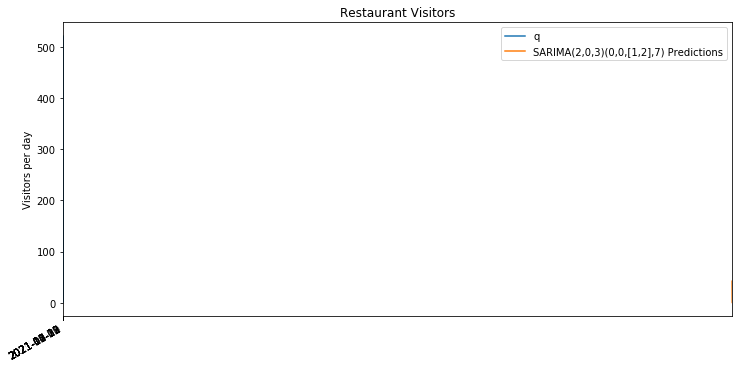

In [25]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['q'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

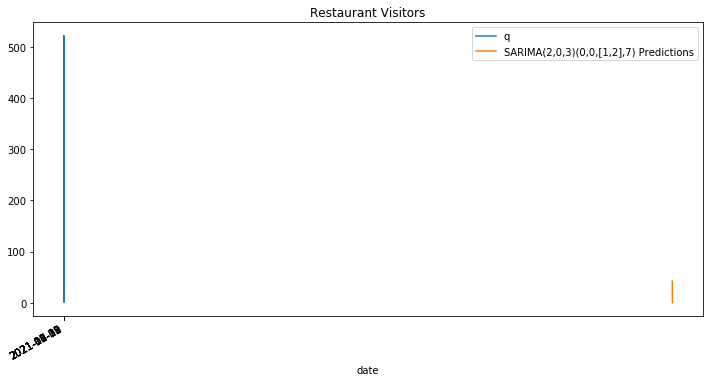

In [28]:
ax = test['q'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)

In [30]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['q'], predictions)
error2 = rmse(test['q'], predictions)

print(f'SARIMA(2,0,3)(0,0,2,7) MSE Error: {error1:11.10}')
print(f'SARIMA(2,0,3)(0,0,2,7) RMSE Error: {error2:11.10}')

SARIMA(2,0,3)(0,0,2,7) MSE Error: 6203.648901
SARIMA(2,0,3)(0,0,2,7) RMSE Error: 78.76324588


In [36]:
model = SARIMAX(train['q'],exog=train2['prec'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -5215.826
Date:                                Fri, 12 Aug 2022   AIC                          10449.651
Time:                                        10:42:43   BIC                          10492.057
Sample:                                    01-01-2019   HQIC                         10465.920
                                         - 04-01-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
prec           7.8329      0.229     34.261      0.000       7.385       8.281
ar.L1          0.4751      0.123      3.869      0.000       0.234       0.716
ar.L2          0.4587      0.108      4.259      0.000       0.248       0.670
ma.L1          0.0120      0.122      0.098      0.922      -0.227       0.251
ma.L2         -0.4188      0.055     -7.591      0.000      -0.527      -0.311
ma.L3         -0.2489      0.033     -7.470      0.000      -0.314      -0.184
ma.S.L7       -0.0233      0.054     -0.429      0.668      -0.130       0.083
ma.S.L14      -0.0771      0.049     -1.561      0.119      -0.174       0.020
sigma2      2.032e+04    305.757     66.446      0.000    1.97e+04    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            559154.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.57   Skew:                             8.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test2[['prec']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Predictions')

[Text(0, 0.5, 'Visitors per day'), Text(0.5, 0, '')]

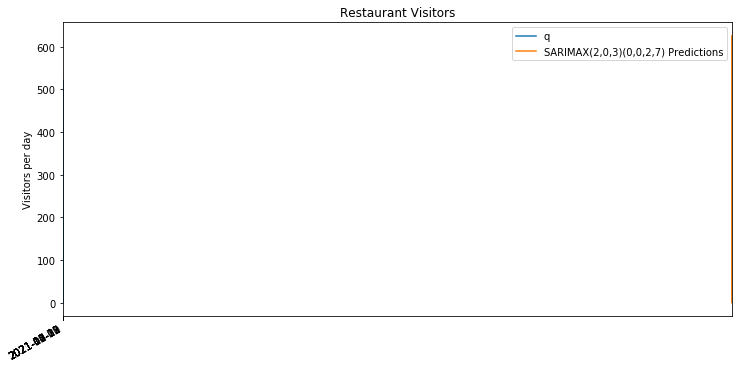

In [41]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['q'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [42]:
print(f'SARIMA(2,0,3)(0,0,2,7) MSE Error: {error1:11.10}')
print(f'SARIMA(2,0,3)(0,0,2,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['q'], predictions)
error2x = rmse(test['q'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(2,0,3)(0,0,2,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(2,0,3)(0,0,2,7) RMSE Error: {error2x:11.10}')

SARIMA(2,0,3)(0,0,2,7) MSE Error: 6203.648901
SARIMA(2,0,3)(0,0,2,7) RMSE Error: 78.76324588

SARIMAX(2,0,3)(0,0,2,7) MSE Error: 6659.276962
SARIMAX(2,0,3)(0,0,2,7) RMSE Error: 81.60439303


In [84]:
model = SARIMAX(df2['q'],exog=df1['prec'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df1[822:][['prec']]
fcast = results.predict(len(train),len(train)+273,exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Forecast')

In [85]:
fcast

2021-04-02     37.054619
2021-04-03    309.960951
2021-04-04    -69.489373
2021-04-05    206.762977
2021-04-06    163.221437
                 ...    
2021-12-27      5.090246
2021-12-28      5.918526
2021-12-29      9.170343
2021-12-30      4.560333
2021-12-31      6.907501
Freq: D, Name: SARIMAX(2,0,3)(0,0,2,7) Forecast, Length: 274, dtype: float64

In [60]:
test['q']

date
2021-04-02     38.120
2021-04-03     78.457
2021-04-04    389.262
2021-04-05    242.339
2021-04-06    145.385
               ...   
2021-12-27      6.911
2021-12-28      6.943
2021-12-29      6.961
2021-12-30      6.997
2021-12-31      7.022
Name: q, Length: 274, dtype: float64

[Text(17.200000000000017, 0.5, 'Visitors per day'),
 Text(0.5, 3.200000000000003, '')]

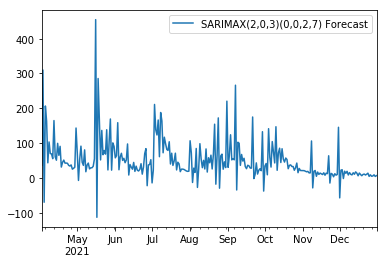

In [87]:
ax = df1['total'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

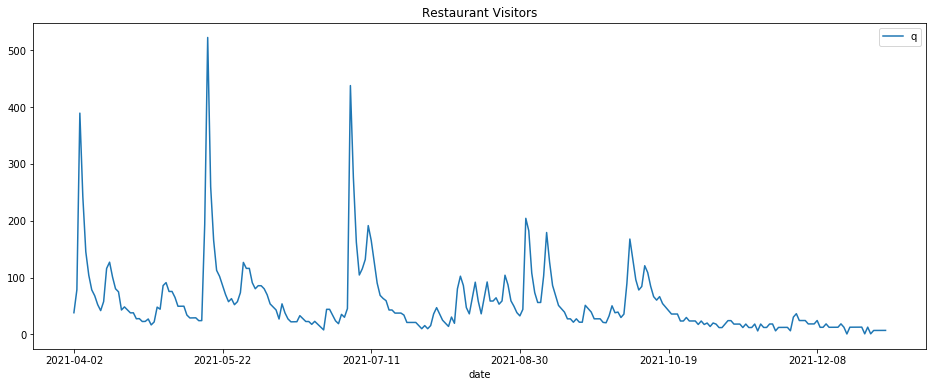

In [88]:
test['q'].plot(legend=True,figsize=(16,6),title=title)

[Text(17.200000000000017, 0.5, 'Visitors per day'),
 Text(0.5, 3.200000000000003, '')]

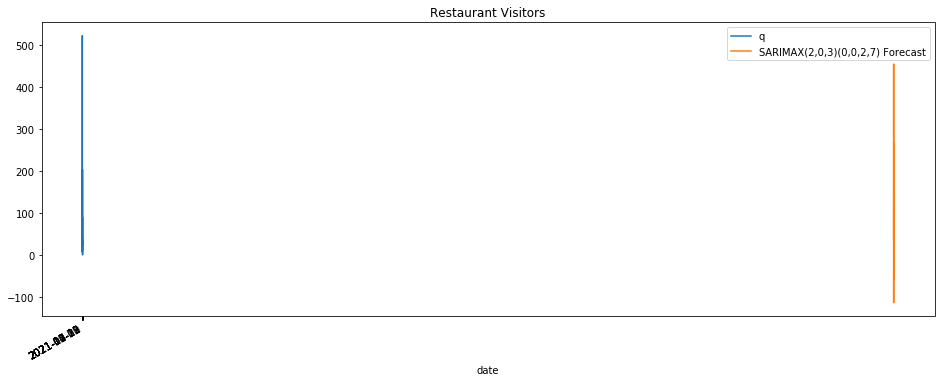

In [89]:
test['q'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel)